In [1]:
#@title
# import required libraries

import pandas as pd # dataframes
import numpy as np #mathematical operations

# to visualise

import plotly.express as px # plotly
from wordcloud import WordCloud # wordclouds
import matplotlib.pyplot as plt #matplot
import seaborn as sns #seaborn

# preprocessing 

import re #Regular expressions
import nltk #NLP library
import spacy
import string
from bs4 import BeautifulSoup #HTML tags
from nltk.corpus import stopwords #english stopwords
#lematising
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Vectorisation

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Treating class imbalanced data

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# model building

from sklearn.model_selection import train_test_split

# algorithms

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# checking up with models

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
# landing google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load your dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Method 2 - Titles/preprocessed_title_OVR.csv",index_col=[0])

In [4]:
# change both types into string
df['Title'] = df['Title'].astype('str')
df['Intervention Area'] = df['Intervention Area'].astype('str') 

In [5]:
# Replace DigitalInclusion value with 1
df.loc[df["Intervention Area"] == "Digital Inclusion", "Intervention Area"] = 1
df.head(5)

,Title,Intervention Area
0,aarogya setu mobile application monitor mitiga...,Digital Information Services
1,online teach ict post covid,Policy & Regulation or Digital Services
2,best method family plan text mining analysis m...,Digital Information Services
3,mobile industry impact sustainable goal,Digital Infrastructure Development
4,recommendation governance guide lawmaker regul...,Cybersecurity


In [6]:
# Replace other values with 0
df.loc[df["Intervention Area"] != 1, "Intervention Area"] = 0

# reorder the dataframe to get DigitalInfrastructure content to appear first
df = df.sort_values(by='Intervention Area', ascending=False)


In [7]:
# check if there are duplicates
df.duplicated(subset=['Title']).any() #duplicates

True

In [8]:
# remove duplicates, leaving the first record
df = df.drop_duplicates(subset=['Title'],keep="first")

In [9]:
# spread of text files after removing duplicates
# Count the number of items per group
group_counts = df.groupby("Intervention Area").count()
group_counts=group_counts.reset_index()

# Create the bar chart
fig = px.bar(group_counts, x='Intervention Area', y='Title',color="Intervention Area")

# Show the chart
fig.show()

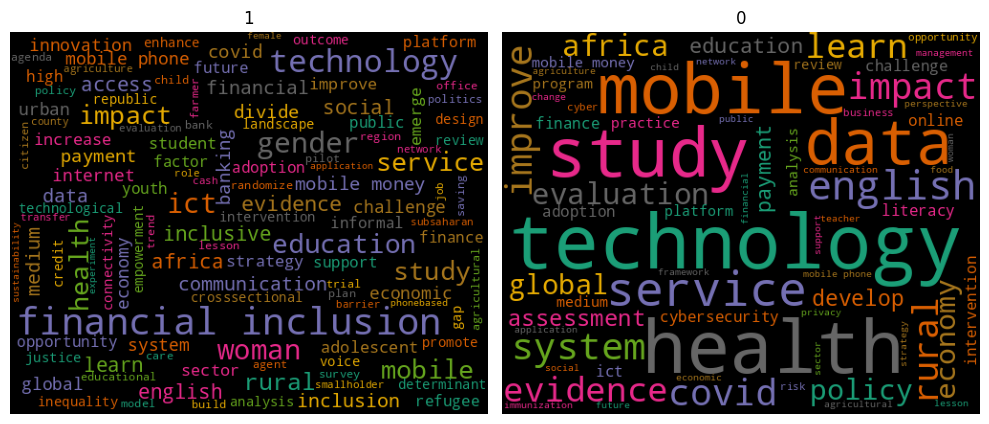

In [10]:
# word clouds based on intervention areas

# Get all the unique classes in the dataset
classes = df['Intervention Area'].unique()

# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs = axs.ravel()

# Iterate through each class
for i, class_name in enumerate(classes):
    # Get all the text for the current class
    class_text = df[df['Intervention Area'] == class_name]['Title'].str.cat(sep=' ')
    # Generate the wordcloud
    wordcloud = WordCloud(width = 500, height = 400, 
                colormap="Dark2",
                min_font_size = 10).generate(class_text) 
    # Plot the wordcloud
    axs[i].imshow(wordcloud) 
    axs[i].set_title(f"{class_name}") 
    axs[i].axis("off") 
fig.tight_layout()
plt.show()

In [11]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# Filter the dataframe to include only class 0 samples
class_0_df = df[df['Intervention Area'] == 0]

# Concatenate the text data from class 0 samples into a single string
class_0_text = ' '.join(class_0_df['Title'])

# Tokenize and filter the text data from class 0 samples
class_0_tokens = nltk.word_tokenize(class_0_text)

# Count the frequency of each word in class 0
class_0_word_freq = nltk.FreqDist(class_0_tokens)

# Filter the dataframe to include only class 1 samples
class_1_df = df[df['Intervention Area'] == 1]

# Concatenate the text data from class 1 samples into a single string
class_1_text = ' '.join(class_1_df['Title'])

# Tokenize and filter the text data from class 1 samples
class_1_tokens = nltk.word_tokenize(class_1_text)

# Count the frequency of each word in class 1
class_1_word_freq = nltk.FreqDist(class_1_tokens)

# Get the keywords that are common in class 1 but not common in class 0
k = 10  # Specify the desired number of keywords
keywords = []

for word, frequency in class_1_word_freq.items():
    if word in class_0_word_freq:
        if frequency > class_0_word_freq[word]:
            keywords.append((word, frequency))

# Sort the keywords by frequency in descending order
keywords.sort(key=lambda x: x[1], reverse=True)


# Print the top keywords
for keyword, frequency in keywords[:k]:
    print(keyword, frequency)

inclusion 43
financial 43
gender 19
woman 18
ict 14
inclusive 10
access 10
divide 8
banking 8
innovation 7


In [14]:
# vectorsing the content column
vectorizer = TfidfVectorizer(stop_words=None, max_features=100)
vectorized_df = vectorizer.fit_transform(df['Title'])
# defining the y label
y = df['Intervention Area']
y=y.astype('int')
y=y.to_frame()

In [15]:
keywords= ['inclusion','financial','gender','women']

In [18]:
# Create binary features for each keyword
for keyword in keywords:
    df[keyword] = np.where(df['Title'].str.contains(keyword), 1, 0)

In [19]:
from scipy.sparse import hstack

# Concatenate the binary features with the vectorized features
X = hstack([vectorized_df, df[keywords].values])

In [20]:
# train test split
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=75)

In [21]:
# treat class imbalanced data
ros = RandomOverSampler(random_state=1500)
X_trainro, Y_trainro = ros.fit_resample(X_train, Y_train)

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_trainru, Y_trainru = rus.fit_resample(X_train, Y_train)

Decision Tree

In [24]:
# fit the model
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, Y_train.values.ravel())

# make predictions
pred_dt = dt.predict(x_test)

# print accuracy 
print("Accuracy %s" % accuracy_score(pred_dt,y_test))

Accuracy 0.731404958677686


In [25]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       178
           1       0.49      0.55      0.52        64

    accuracy                           0.73       242
   macro avg       0.66      0.67      0.67       242
weighted avg       0.74      0.73      0.74       242



Naive bayes

In [28]:
# fit the model
nb = MultinomialNB()
nb.fit(X_trainro, Y_trainro.values.ravel())

# make predictions 
pred_nb = nb.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_nb,y_test))

Accuracy 0.7479338842975206


In [29]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       178
           1       0.52      0.58      0.55        64

    accuracy                           0.75       242
   macro avg       0.68      0.69      0.69       242
weighted avg       0.76      0.75      0.75       242



K-Nearest

In [30]:
# fit the model
knn = KNeighborsClassifier()
knn.fit(X_trainro, Y_trainro.values.ravel())

# make predictions
pred_knn = knn.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_knn,y_test))

Accuracy 0.6776859504132231


In [31]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       178
           1       0.41      0.53      0.47        64

    accuracy                           0.68       242
   macro avg       0.61      0.63      0.62       242
weighted avg       0.71      0.68      0.69       242



Logistic

In [32]:
# fit the model
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, Y_train.values.ravel())

# make predictions
pred_lr = lr.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_lr,y_test))

Accuracy 0.7272727272727273


In [33]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       178
           1       0.49      0.61      0.54        64

    accuracy                           0.73       242
   macro avg       0.67      0.69      0.67       242
weighted avg       0.75      0.73      0.74       242



Ada boost

In [34]:
# fit the model
ab = AdaBoostClassifier()
ab.fit(X_trainro, Y_trainro.values.ravel())

# make predictions
pred_ab = ab.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_ab,y_test))

Accuracy 0.7066115702479339


In [35]:
print(classification_report(y_test,pred_ab))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       178
           1       0.45      0.50      0.47        64

    accuracy                           0.71       242
   macro avg       0.63      0.64      0.64       242
weighted avg       0.72      0.71      0.71       242



SGD

In [36]:
# fit the model
sgd = SGDClassifier(class_weight='balanced')
sgd.fit(X_train, Y_train.values.ravel())

# make predictions
pred_sgd = sgd.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))

Accuracy 0.7231404958677686


In [37]:
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       178
           1       0.48      0.66      0.56        64

    accuracy                           0.72       242
   macro avg       0.67      0.70      0.68       242
weighted avg       0.76      0.72      0.73       242



Support Vector

In [38]:
# fit the model
svc = SVC()
svc.fit(X_trainro, Y_trainro.values.ravel())

# make predictions
pred_svc = svc.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_svc,y_test))

Accuracy 0.743801652892562


In [ ]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       142
           1       0.46      0.40      0.42        43

    accuracy                           0.75       185
   macro avg       0.64      0.63      0.63       185
weighted avg       0.74      0.75      0.74       185



In [39]:
from sklearn.ensemble import VotingClassifier

# Create instances of the SGDClassifier and RandomForestClassifier
dt = DecisionTreeClassifier(class_weight='balanced')
nb = MultinomialNB()

# Create an instance of the VotingClassifier
ensemble = VotingClassifier(estimators=[('dt', dt), ('nb', nb)], voting='hard')

# Fit the VotingClassifier to the data
ensemble.fit(X_trainro, Y_trainro.values.ravel())

# Make predictions
pred_ensemble = ensemble.predict(x_test)

# Print accuracy
print("Accuracy %s" % accuracy_score(pred_ensemble, y_test))

Accuracy 0.7851239669421488


In [40]:
print(classification_report(y_test,pred_ensemble))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       178
           1       0.64      0.42      0.51        64

    accuracy                           0.79       242
   macro avg       0.73      0.67      0.69       242
weighted avg       0.77      0.79      0.77       242



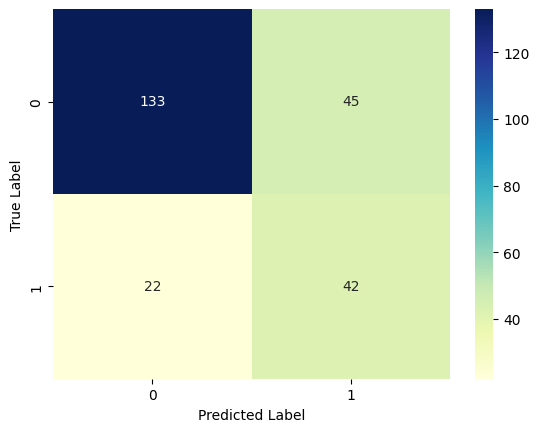

In [41]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_sgd)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "YlGnBu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from joblib import Parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(nb, '/content/drive/MyDrive/Colab Notebooks/Research/digitalinclusion.pkl')

['/content/drive/MyDrive/Colab Notebooks/Research/digitalinclusion.pkl']